# Car Sales Prediction

## Problem Description:
The dataset containts a list of second hand cars with several information about the cars.
Our aim is to predict the price of a used car from its specifications.

### Description of the Variables (Potential Regressors)

##### Brand: Car brand.
##### Model: Car Model.
##### Price: Car price ($).
##### Body: Type of car body.
##### Mileage: Car current mileage (Miles).
##### EngineV: Engine Volume (Litres).
##### Engine Type: Engine Type (Petrol / Diesel / etc).
##### Registration: Whether the car is registered or not.
##### Year: Year of registration.

In [1]:
# Importing the relevant libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression

# Loading the input (raw) data
path='/Users/varun/Desktop/Varun/DataScience/Udemy_DS/MiniProject/'
import os
os.chdir(path)
raw_data = pd.read_csv('CarSales.csv')
raw_data.head()

,Brand,Model,Price,Body,Mileage,EngineV,Engine Type,Registration,Year
0,BMW,320,4200.0,sedan,277,2.0,Petrol,yes,1991
1,Mercedes-Benz,Sprinter 212,7900.0,van,427,2.9,Diesel,yes,1999
2,Mercedes-Benz,S 500,13300.0,sedan,358,5.0,Gas,yes,2003
3,Audi,Q7,23000.0,crossover,240,4.2,Petrol,yes,2007
4,Toyota,Rav 4,18300.0,crossover,120,2.0,Petrol,yes,2011


## Preprocessing

### Exploring the Descriptive Statistics of the Variables

In [2]:
raw_data.describe(include='all')

,Brand,Model,Price,Body,Mileage,EngineV,Engine Type,Registration,Year
count,4345,4345,4173.000000,4345,4345.000000,4195.000000,4345,4345,4345.000000
unique,7,309,NaN,6,NaN,NaN,4,2,NaN
top,Volkswagen,E-Class,NaN,sedan,NaN,NaN,Diesel,yes,NaN
freq,936,199,NaN,1649,NaN,NaN,2019,3947,NaN
mean,NaN,NaN,19418.746935,NaN,161.237284,2.790734,NaN,NaN,2006.550058
std,NaN,NaN,25584.242620,NaN,105.705797,5.066437,NaN,NaN,6.719097
min,NaN,NaN,600.000000,NaN,0.000000,0.600000,NaN,NaN,1969.000000
25%,NaN,NaN,6999.000000,NaN,86.000000,1.800000,NaN,NaN,2003.000000
50%,NaN,NaN,11500.000000,NaN,155.000000,2.200000,NaN,NaN,2008.000000
75%,NaN,NaN,21700.000000,NaN,230.000000,3.000000,NaN,NaN,2012.000000


### Observations from the Descriptive Statistics
##### From count, each variable has different number of observations, which implies there are some missing values.
##### From unique, Model has 309 unique models of cars. It is hard to implement regression with so many variables. Also we need to create 308 dummy variables later-on. We will drop this variable as it is not worth considering it.
##### The Top shows the most common categorical data and Freq shows the number of occurances of the 'Top' data. For Registration variable, 90% of occurances are yes. With such a biased data, we get little information. So, we will drop this variable.

In [3]:
data = raw_data.drop(['Model', 'Registration'], axis=1)
data.describe(include='all')

,Brand,Price,Body,Mileage,EngineV,Engine Type,Year
count,4345,4173.000000,4345,4345.000000,4195.000000,4345,4345.000000
unique,7,NaN,6,NaN,NaN,4,NaN
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,NaN
freq,936,NaN,1649,NaN,NaN,2019,NaN
mean,NaN,19418.746935,NaN,161.237284,2.790734,NaN,2006.550058
std,NaN,25584.242620,NaN,105.705797,5.066437,NaN,6.719097
min,NaN,600.000000,NaN,0.000000,0.600000,NaN,1969.000000
25%,NaN,6999.000000,NaN,86.000000,1.800000,NaN,2003.000000
50%,NaN,11500.000000,NaN,155.000000,2.200000,NaN,2008.000000
75%,NaN,21700.000000,NaN,230.000000,3.000000,NaN,2012.000000


## Checking for and Dealing with the Missing Values

In [4]:
data.isnull().sum()

Brand            0
Price          172
Body             0
Mileage          0
EngineV        150
Engine Type      0
Year             0
dtype: int64

In [5]:
# Observation: Only the variables Price and EngineV have missing values. 
# (172/4345) = 0.039. So 3.9% of Price variable has missing data.
# We will delete the observations with missing data as it is <5% of the data (a thumb-rule I have been using).

In [6]:
data_no_mv = data.dropna(axis=0)
# Here no_mv stands for 'no missing values'
data_no_mv.describe(include='all')

,Brand,Price,Body,Mileage,EngineV,Engine Type,Year
count,4025,4025.000000,4025,4025.000000,4025.000000,4025,4025.000000
unique,7,NaN,6,NaN,NaN,4,NaN
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,NaN
freq,880,NaN,1534,NaN,NaN,1861,NaN
mean,NaN,19552.308065,NaN,163.572174,2.764586,NaN,2006.379627
std,NaN,25815.734988,NaN,103.394703,4.935941,NaN,6.695595
min,NaN,600.000000,NaN,0.000000,0.600000,NaN,1969.000000
25%,NaN,6999.000000,NaN,90.000000,1.800000,NaN,2003.000000
50%,NaN,11500.000000,NaN,158.000000,2.200000,NaN,2007.000000
75%,NaN,21900.000000,NaN,230.000000,3.000000,NaN,2012.000000


## Checking for and Dealing with Outliers

Text(0.5, 1.0, 'Year')

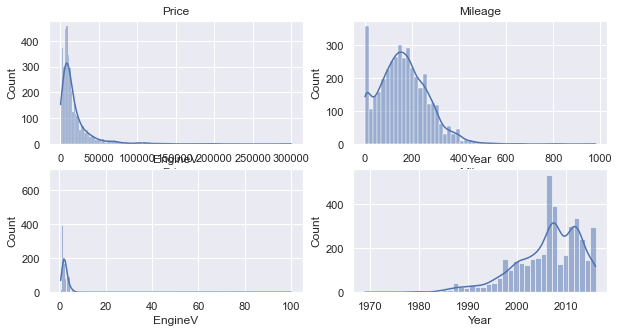

In [7]:
# There are 4 numerical variables (Price, Mileage, EngineV and Year)
fig, axes = plt.subplots(2,2, figsize=(10,5))
sns.histplot(data_no_mv['Price'], ax = axes[0,0], kde=True)
sns.histplot(data_no_mv['Mileage'], ax = axes[0,1], kde=True)
sns.histplot(data_no_mv['EngineV'], ax = axes[1,0], kde=True)
sns.histplot(data_no_mv['Year'], ax = axes[1,1], kde=True)
axes[0,0].set_title('Price')
axes[0,1].set_title('Mileage')
axes[1,0].set_title('EngineV')
axes[1,1].set_title('Year')

In [8]:
# From the Descriptive Statistics Table we can see that the max price = 300,000. 
# From the plot, we can see the outliers to the right.
# Let's remove the top 1% of the outliers. We get this 1% data using the quartile funciton.
q = data_no_mv['Price'].quantile(0.99) 
data1 = data_no_mv[data_no_mv['Price'] < q]
# Dealing with outliers for Mileage
q = data_no_mv['Mileage'].quantile(0.99) 
data2 = data1[data1['Mileage'] < q]
# Dealing with outliers for Max EngineV
# The max Engine volume is 6.5L (quick search from Google).
# From the Descriptive Statistics, the max Engine volume = 99 might be given for the missing values
data3 = data2[data2['EngineV'] < 6.5]
# Dealing with outliers for Year
q = data3['Year'].quantile(0.01) 
data4 = data3[data3['Year'] > q]

In [9]:
data_cleaned = data4.reset_index(drop=True)

In [10]:
data_cleaned.describe(include='all')

,Brand,Price,Body,Mileage,EngineV,Engine Type,Year
count,3866,3866.000000,3866,3866.000000,3866.000000,3866,3866.000000
unique,7,NaN,6,NaN,NaN,4,NaN
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,NaN
freq,848,NaN,1466,NaN,NaN,1807,NaN
mean,NaN,18197.480629,NaN,160.471547,2.450246,NaN,2006.713140
std,NaN,19087.396949,NaN,95.543697,0.949413,NaN,6.101235
min,NaN,800.000000,NaN,0.000000,0.600000,NaN,1988.000000
25%,NaN,7200.000000,NaN,91.000000,1.800000,NaN,2003.000000
50%,NaN,11700.000000,NaN,157.000000,2.200000,NaN,2008.000000
75%,NaN,21700.000000,NaN,225.000000,3.000000,NaN,2012.000000


## Check for OLS Assumptions
As we are going to fit a Linear Regression Model, we need to check for the OLS (Ordinary Least Squares) Assumptions.

First checking for Linearity

Text(0.5, 1.0, 'Year vs Price')

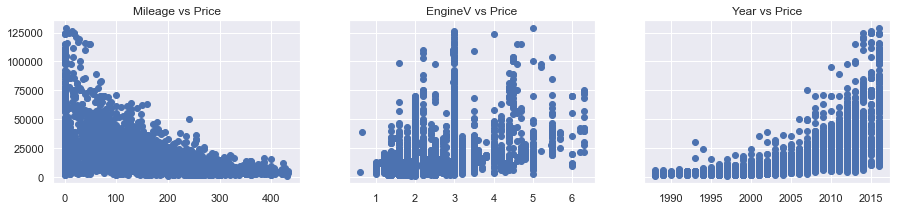

In [11]:
fig, (ax1, ax2, ax3) = plt.subplots(1,3, figsize=(15,3), sharey=True)
ax1.scatter(data_cleaned['Mileage'], data_cleaned['Price'])
ax2.scatter(data_cleaned['EngineV'], data_cleaned['Price'])
ax3.scatter(data_cleaned['Year'], data_cleaned['Price'])
ax1.set_title('Mileage vs Price')
ax2.set_title('EngineV vs Price')
ax3.set_title('Year vs Price')

In [12]:
# We can see that the relationship between the Features and Targets variables is not linear. 
# We can not run a linear regression where the relationship is not linear.
# Let's transform the relationship to linear
#
# After careful observation, we can see that the Price variable is exponentially distributed. 
# So if you apply log to the Price variable, the relationship with other variables will be linear

In [13]:
log_price = np.log(data_cleaned['Price'])
data_cleaned['log_price'] = log_price
data_cleaned.head()

,Brand,Price,Body,Mileage,EngineV,Engine Type,Year,log_price
0,BMW,4200.0,sedan,277,2.0,Petrol,1991,8.342840
1,Mercedes-Benz,7900.0,van,427,2.9,Diesel,1999,8.974618
2,Mercedes-Benz,13300.0,sedan,358,5.0,Gas,2003,9.495519
3,Audi,23000.0,crossover,240,4.2,Petrol,2007,10.043249
4,Toyota,18300.0,crossover,120,2.0,Petrol,2011,9.814656


Text(0.5, 1.0, 'Year vs log_Price')

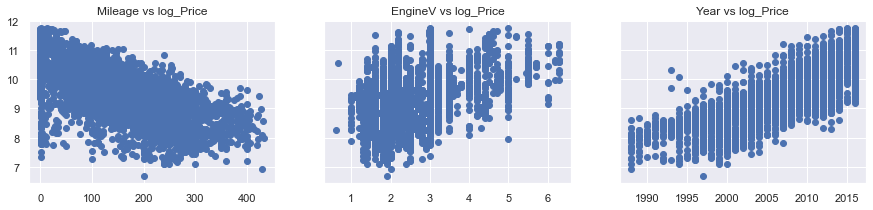

In [14]:
# Re-plot the data after log transformation of Price variable
fig, (ax1, ax2, ax3) = plt.subplots(1,3, figsize=(15,3), sharey=True)
ax1.scatter(data_cleaned['Mileage'], data_cleaned['log_price'])
ax2.scatter(data_cleaned['EngineV'], data_cleaned['log_price'])
ax3.scatter(data_cleaned['Year'], data_cleaned['log_price'])
ax1.set_title('Mileage vs log_Price')
ax2.set_title('EngineV vs log_Price')
ax3.set_title('Year vs log_Price')

In [15]:
# Now we see that the relaitonship is linear
data_cleaned = data_cleaned.drop(['Price'], axis=1)

In [16]:
# Checking for Multi-collinearity
data_cleaned.columns.values

array(['Brand', 'Body', 'Mileage', 'EngineV', 'Engine Type', 'Year',
       'log_price'], dtype=object)

In [17]:
# It appears that the Mileage and Year of Manufacturing will be correlated to some degree. 
# If it does, it will violate the multi-collinearity assumption. Let's check this using VIF (Variance Inflation Factor)
from statsmodels.stats.outliers_influence import variance_inflation_factor
variables_to_check = data_cleaned[['Mileage', 'EngineV', 'Year']]
vif = pd.DataFrame()
vif['VIF'] = [variance_inflation_factor(variables_to_check.values, i) for i in range(variables_to_check.shape[1])]
vif['Features'] = variables_to_check.columns
vif

,VIF,Features
0,3.794319,Mileage
1,7.660317,EngineV
2,10.360888,Year


In [18]:
# As the VIF > 10 for Year, it has high correlation with other variables. So, we remove the variable
data_cleaned = data_cleaned.drop(['Year'], axis=1)
data_cleaned.head()

,Brand,Body,Mileage,EngineV,Engine Type,log_price
0,BMW,sedan,277,2.0,Petrol,8.342840
1,Mercedes-Benz,van,427,2.9,Diesel,8.974618
2,Mercedes-Benz,sedan,358,5.0,Gas,9.495519
3,Audi,crossover,240,4.2,Petrol,10.043249
4,Toyota,crossover,120,2.0,Petrol,9.814656


## Create Dummies to consider the Categorical Data in Regression

In [19]:
data_with_dummies = pd.get_dummies(data_cleaned, drop_first=True)
data_with_dummies.head()
# Here, the categorical data that has been dropped is the reference one. 
# The reference data are: Audi for Brand; crossover for Body; Diesel for EngineType.

,Mileage,EngineV,log_price,Brand_BMW,Brand_Mercedes-Benz,Brand_Mitsubishi,Brand_Renault,Brand_Toyota,Brand_Volkswagen,Body_hatch,Body_other,Body_sedan,Body_vagon,Body_van,Engine Type_Gas,Engine Type_Other,Engine Type_Petrol
0,277,2.0,8.342840,1,0,0,0,0,0,0,0,1,0,0,0,0,1
1,427,2.9,8.974618,0,1,0,0,0,0,0,0,0,0,1,0,0,0
2,358,5.0,9.495519,0,1,0,0,0,0,0,0,1,0,0,1,0,0
3,240,4.2,10.043249,0,0,0,0,0,0,0,0,0,0,0,0,0,1
4,120,2.0,9.814656,0,0,0,0,1,0,0,0,0,0,0,0,0,1


In [20]:
data_with_dummies.columns.values

array(['Mileage', 'EngineV', 'log_price', 'Brand_BMW',
       'Brand_Mercedes-Benz', 'Brand_Mitsubishi', 'Brand_Renault',
       'Brand_Toyota', 'Brand_Volkswagen', 'Body_hatch', 'Body_other',
       'Body_sedan', 'Body_vagon', 'Body_van', 'Engine Type_Gas',
       'Engine Type_Other', 'Engine Type_Petrol'], dtype=object)

In [21]:
# Re-arranging the variables to have the dependant (Target) variable as the first variable
cols = ['log_price', 'Mileage', 'EngineV', 'Brand_BMW',
       'Brand_Mercedes-Benz', 'Brand_Mitsubishi', 'Brand_Renault',
       'Brand_Toyota', 'Brand_Volkswagen', 'Body_hatch', 'Body_other',
       'Body_sedan', 'Body_vagon', 'Body_van', 'Engine Type_Gas',
       'Engine Type_Other', 'Engine Type_Petrol']
data_preprocessed = data_with_dummies[cols]
data_preprocessed.head()

,log_price,Mileage,EngineV,Brand_BMW,Brand_Mercedes-Benz,Brand_Mitsubishi,Brand_Renault,Brand_Toyota,Brand_Volkswagen,Body_hatch,Body_other,Body_sedan,Body_vagon,Body_van,Engine Type_Gas,Engine Type_Other,Engine Type_Petrol
0,8.342840,277,2.0,1,0,0,0,0,0,0,0,1,0,0,0,0,1
1,8.974618,427,2.9,0,1,0,0,0,0,0,0,0,0,1,0,0,0
2,9.495519,358,5.0,0,1,0,0,0,0,0,0,1,0,0,1,0,0
3,10.043249,240,4.2,0,0,0,0,0,0,0,0,0,0,0,0,0,1
4,9.814656,120,2.0,0,0,0,0,1,0,0,0,0,0,0,0,0,1


## Linear Regression Model

### Define the Features and Targets

In [22]:
target = data_preprocessed['log_price']
features = data_preprocessed.drop(['log_price'], axis=1)

### Standardise the Data

In [23]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(features)
features_scaled = scaler.transform(features)

### Test Train Split

In [24]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(features_scaled, target, test_size=0.2, random_state=200)

### Create the Regression Model

In [25]:
reg= LinearRegression()
reg.fit(x_train,y_train)

LinearRegression()

In [26]:
# Let's check the Regression Model by comparing the predicted values with the observed values (targets).
# The difference between these 2 values is the Residual.
# Note that we are doing this with the Train Data
y_hat = reg.predict(x_train)

Text(0.5, 1.0, 'Residual Probability Distribution Fuction')

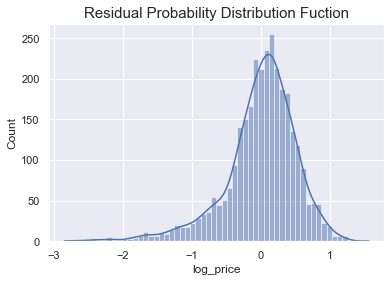

In [27]:
sns.histplot((y_train - y_hat), kde=True)
plt.title('Residual Probability Distribution Fuction', size=15)
# It can be seen from the residual plot that there is negative values to extreme left. 
# This means, the Regression model is highly over estimating the proce for few data.

In [28]:
# R-squared of the Model
reg.score(x_train, y_train)

0.6469263969237535

### The Weights and Bias

In [29]:
# Bias is the intercept
reg.intercept_

9.418917789696367

In [30]:
reg_coef_summary = pd.DataFrame()
reg_coef_summary['Features'] = features.columns.values
reg_coef_summary['weights'] = reg.coef_
reg_coef_summary

,Features,weights
0,Mileage,-0.529463
1,EngineV,0.224736
2,Brand_BMW,0.037824
3,Brand_Mercedes-Benz,0.058350
4,Brand_Mitsubishi,-0.107927
5,Brand_Renault,-0.130937
6,Brand_Toyota,-0.020178
7,Brand_Volkswagen,-0.038909
8,Body_hatch,-0.170102
9,Body_other,-0.096041


In [31]:
# Interpretation of Weights for the continuous Variables
# A positive weight indicates that as the feature increases, so does the price
# A negative weight indicates that as the feature increases, so the price reduces
# For example, as Mileage increases, the price reduces. As EngineV increases, price increases.

# Interpretation of Weights for the Dummy Variables (Categorical Data)
# A positive weight indicates that the respective category is more expensive than the reference category (For eg. Audi)
# A negative weight indicates that the respective category is less expensive than the reference category

### Testing the Regression Model using Test Data

(6.0, 13.0)

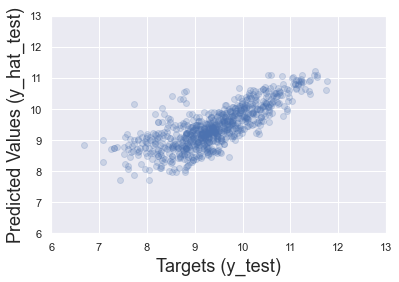

In [32]:
y_hat_test = reg.predict(x_test)

# Plot the data on the Scatter plot
plt.scatter(y_test, y_hat_test, alpha=0.2)
plt.xlabel('Targets (y_test)', size=18)
plt.ylabel('Predicted Values (y_hat_test)', size=18)
plt.xlim(6,13)
plt.ylim(6,13)

In [33]:
# We can see that at higher prices, the model prediction is very good. It is more scattered at lower prices.
# Overall, the high concentration is at 45-deg line.

In [34]:
# Now, let's manually compare the prices
prices = pd.DataFrame(np.exp(y_hat_test), columns=['Predicted'])
y_test = y_test.reset_index(drop=True)
prices['Actual (y_test)'] = np.exp(y_test)
prices['Residual'] = prices['Actual (y_test)'] - prices['Predicted']
prices['% Difference'] = np.absolute(prices['Residual']/prices['Actual (y_test)'])*100
prices.describe()

,Predicted,Actual (y_test),Residual,% Difference
count,774.000000,774.000000,774.000000,774.000000
mean,15243.823471,17219.908747,1976.085276,50.759289
std,11938.478492,17438.052632,9765.055624,82.541527
min,2230.679970,800.000000,-32174.271691,0.002992
25%,7516.999098,6800.000000,-2868.135144,13.698489
50%,11326.828414,11500.000000,493.142861,28.968712
75%,18760.354460,20900.000000,4415.327755,48.847060
max,74476.146012,129222.000000,85090.701376,1003.734527


In [35]:
pd.options.display.max_rows = 999
pd.set_option('display.float_format', lambda x: '%.1f' %x)
prices.sort_values(by=['% Difference'])

,Predicted,Actual (y_test),Residual,% Difference
492,6557.7,6557.8,0.2,0.0
628,11507.8,11499.0,-8.8,0.1
118,28872.1,28900.0,27.9,0.1
525,7809.4,7800.0,-9.4,0.1
358,5741.3,5750.0,8.7,0.2
642,21450.8,21500.0,49.2,0.2
149,9571.6,9600.0,28.4,0.3
391,28786.6,28700.0,-86.6,0.3
460,25421.0,25500.0,79.0,0.3
749,18977.2,18900.0,-77.2,0.4


In [36]:
# Observations:
# From the prices.describe() summary, we can see that the mean car price is $17,220. 
# From the '% Difference' sorted table, we can see that the higher % difference at the bottom of the table is
# at low car price. The same obervation can also be made using the scatter plot of the Train data.

# An explanation for higher residuals for some observations is that we might be missing an important factor. 
# It may be that the very cheap cars might be damaged and we did not consider this parameter. 
# The data set might be missing few other relavent parameters.